In [1]:
cd /content/drive/MyDrive/Dataset/CNN 


/content/drive/MyDrive/Dataset/CNN


In [2]:
pwd


'/content/drive/MyDrive/Dataset/CNN'

In [ ]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  infla

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMAGE AUGMENTATION


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.2,horizontal_flip = True,vertical_flip = True
                   )

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/Dataset/CNN/flowers/Training",target_size=(64,64),class_mode = "categorical",batch_size = 25)

Found 4317 images belonging to 5 classes.


In [7]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/Dataset/CNN/flowers/Testing",target_size=(64,64),class_mode = "categorical",batch_size = 25)

Found 2510 images belonging to 5 classes.


In [8]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

CNN LAYERS


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [10]:
#initialize
model = Sequential()

In [11]:
model.add(Convolution2D(32,(3,3),activation="relu",strides=(1,1),input_shape = (64,64,3)))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))


In [13]:
model.add(Flatten())


In [14]:
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

In [15]:
model.add(Dense(5,activation="softmax"))

In [16]:
model.compile(loss = "categorical_crossentrophy",optimizer="adam",metrics=["accuracy"])

In [17]:
model.fit(x_train, batch_size=25, epochs=1, verbose='auto', callbacks=None, validation_split=0.0, validation_data=None, initial_epoch=0, steps_per_epoch=25, validation_steps= 5)

ValueError: ignored

In [ ]:
model.save("fw.h5")

testing model

In [18]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [19]:
model = load_model('fw.h5')

ValueError: ignored

In [20]:
img = image.load_img(r"/content/drive/MyDrive/Dataset/CNN/flowers/Training/dandelion/10294487385_92a0676c7d_m.jpg")

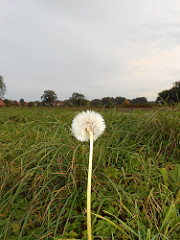

In [21]:
img

In [22]:
img = image.load_img(r"/content/drive/MyDrive/Dataset/CNN/flowers/Training/dandelion/10294487385_92a0676c7d_m.jpg",target_size=(64,64))

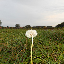

In [23]:
img

In [24]:
x = image.img_to_array(img)

In [ ]:
x

array([[[213., 214., 216.],
        [213., 214., 218.],
        [212., 213., 217.],
        ...,
        [238., 237., 233.],
        [240., 236., 233.],
        [240., 237., 232.]],

       [[214., 215., 219.],
        [213., 214., 219.],
        [215., 216., 221.],
        ...,
        [238., 237., 233.],
        [240., 236., 233.],
        [242., 239., 234.]],

       [[213., 216., 221.],
        [212., 215., 220.],
        [211., 214., 219.],
        ...,
        [236., 235., 233.],
        [237., 236., 234.],
        [238., 237., 233.]],

       ...,

       [[ 41.,  50.,   3.],
        [ 65.,  74.,  17.],
        [ 83.,  80.,  29.],
        ...,
        [ 54.,  71.,  27.],
        [ 80.,  54.,  27.],
        [ 68.,  82.,  21.]],

       [[ 98., 112.,  37.],
        [ 62.,  67.,  26.],
        [ 54.,  70.,   8.],
        ...,
        [ 93., 102.,  47.],
        [ 83., 102.,  20.],
        [ 50.,  40.,  13.]],

       [[ 55.,  70.,  11.],
        [113., 110.,   7.],
        [ 83.,  

In [25]:
x = np.expand_dims(x,axis=0)

In [26]:
x

array([[[[213., 214., 216.],
         [213., 214., 218.],
         [212., 213., 217.],
         ...,
         [238., 237., 233.],
         [240., 236., 233.],
         [240., 237., 232.]],

        [[214., 215., 219.],
         [213., 214., 219.],
         [215., 216., 221.],
         ...,
         [238., 237., 233.],
         [240., 236., 233.],
         [242., 239., 234.]],

        [[213., 216., 221.],
         [212., 215., 220.],
         [211., 214., 219.],
         ...,
         [236., 235., 233.],
         [237., 236., 234.],
         [238., 237., 233.]],

        ...,

        [[ 41.,  50.,   3.],
         [ 65.,  74.,  17.],
         [ 83.,  80.,  29.],
         ...,
         [ 54.,  71.,  27.],
         [ 80.,  54.,  27.],
         [ 68.,  82.,  21.]],

        [[ 98., 112.,  37.],
         [ 62.,  67.,  26.],
         [ 54.,  70.,   8.],
         ...,
         [ 93., 102.,  47.],
         [ 83., 102.,  20.],
         [ 50.,  40.,  13.]],

        [[ 55.,  70.,  11.],
       

In [27]:
pred = model.predict(x)

In [28]:
pred

array([[3.4221390e-09, 6.7299144e-12, 2.7650608e-31, 1.0000000e+00,
        5.2833423e-14]], dtype=float32)

In [29]:
x_test.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [30]:
index = ["daisy","dandelion","rose","sunflower","tulip"]

In [31]:
index[np.argmax(pred)]

'sunflower'